Clustering**

En este proyecto agruparemos los países en función a distintos atributos.

Variables:

- Country: nombre del país
- Abbrev: abreviatura del país
- Corruption: percepción de corrupción en cada país
- Peace: nivel de paz o estabilidad en cada país
- Legal: percepción de la justicia en cada país
- GDP Growth: crecimiento del Producto Interno Bruto (PIB) en cada país

## Importar bibliotecas y conjunto de datos.

In [51]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [52]:
raw_original= pd.read_csv('/content/country_risk.csv')
raw_original.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713


In [53]:
raw_original.shape

(121, 6)

## Análisis exploratorio

Imprimir las estadísticas.

In [54]:
print("\nSummary statistics\n", raw_original.describe())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000


## *Pregunta 1*
Creamos un nuevo dataset denominado "raw" que contenga "todas" las variables que nos aportan alguna información relevante para la generación de los clusters.

In [55]:
# Ingrese su respuesta aquí (complete el código)
raw = raw_original[['Corruption', 'Peace', 'Legal', 'GDP Growth']]

## Visualización de datos

## *Pregunta 2*

Trazar los histogramas de las variables previamente seleccionadas.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

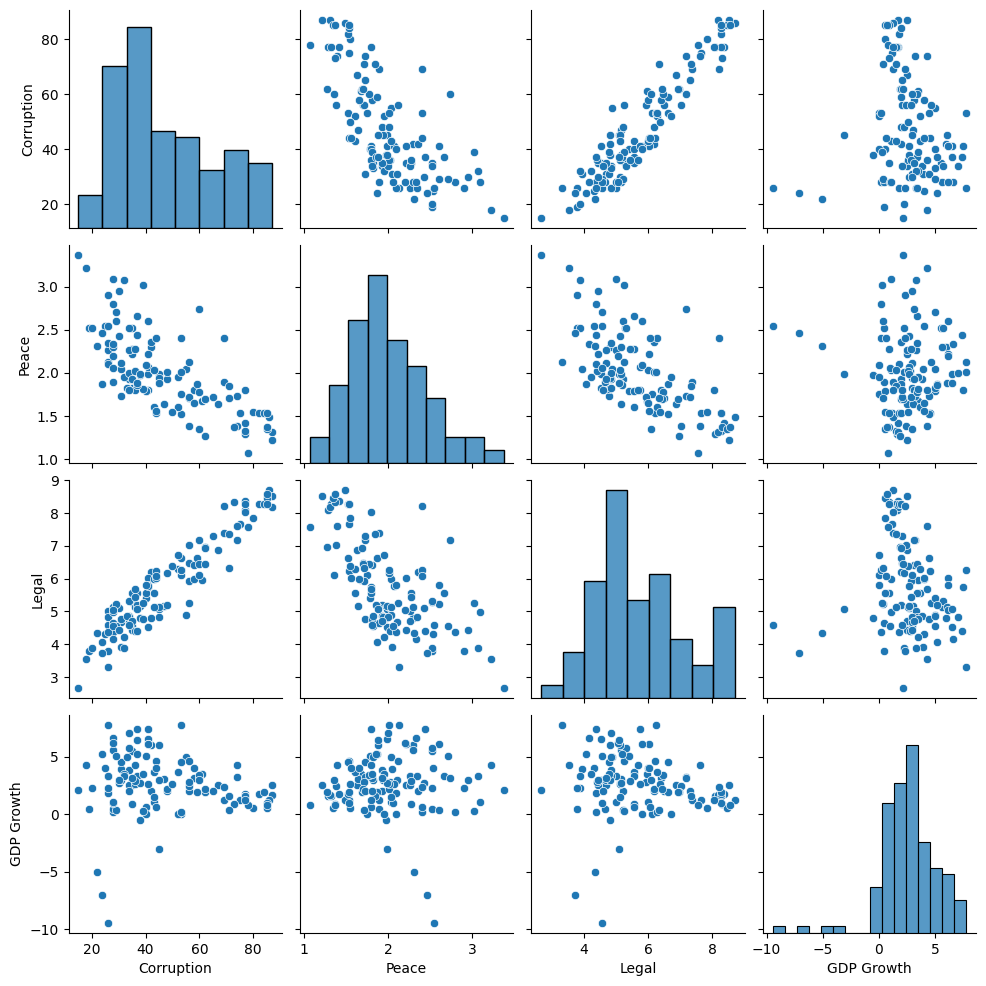

In [56]:
sns.pairplot(raw)

## *Pregunta 3.1*
Realizar un mapa de calor con las variables previamente seleccionadas.

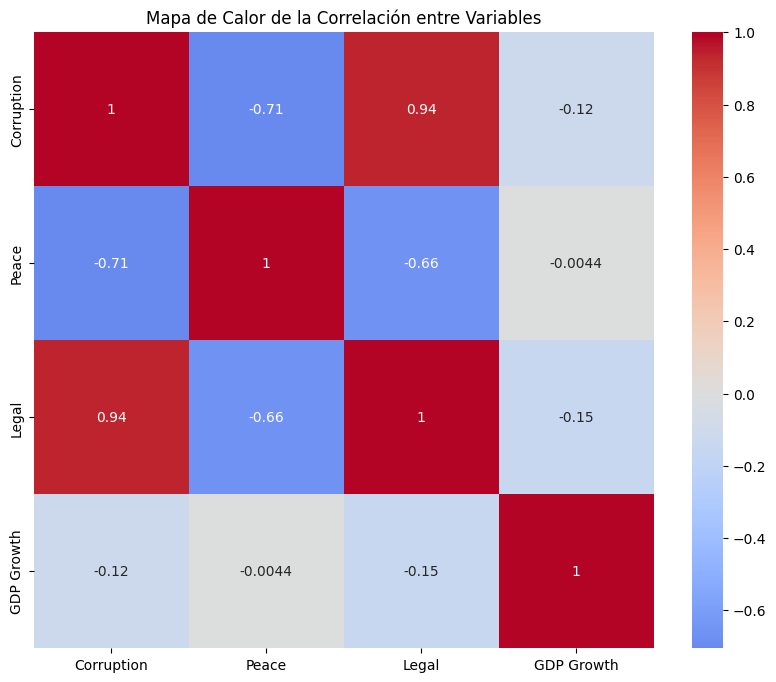

In [57]:
correlation_matrix = raw.corr()

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Añadir el título
plt.title('Mapa de Calor de la Correlación entre Variables')

# Mostrar el gráfico
plt.show()

## *Pregunta 3.2*
¿Encuentra variables altamente correlacionadas? De ser el caso, ¿que acciones realizaría?

```

1.   Me parece muy extraño que corrupción está altamente correlacionado con Legal. La percepción de corrupción y la percepción de justicia de cada país están altamente correlacionadas con un coeficiente de 0.94, lo cual se debe a que IPC (indice de percepción de corrupción da un puntaje alto a los países que tienen poca corrupción y un puntaje bajo a quienes tienen mucha corrupción).
2.   Lo normal es que que la percepción de corrupción esté inversamente asociado con el nivel de paz o estabilidad en cada país con un coeficiente de correlación de -0.71 porque los países menos corruptos son los que tienen un valor más alto y los países que tienen más paz tienen un balor más bajo, puesto que así se mide el índice de percepción de paz global. Esto quiere decir que es lógico que estén inversamente correlacionados.
3.   Por otro lado, se muestra una correlación negativa entre el nivel de paz o estabilidad en cada país y la percepción de legalidad.
4.   Finalmente, la variable de crecimiento de PBI (GDP Growth) parece mostrar una relación débil con las demás variables. Puede ser importante para la varianza y la selección de los datos.
Conclusión: Se eliminará la variable de corrupción por generar coinealidad al modelo y no aportar gran variabilidad para la correcta agrupación del modelo.


# Ingrese su respuesta aquí (texto)
```

In [58]:
raw = raw.drop('Corruption', axis=1)

## Normalización

## *Pregunta 4*
Normalizar todas las variables previamente seleccionadas. Se crea un nuevo dataset denominado "X".

In [59]:
z_score_normalized = (raw - raw.mean()) / raw.std()

# Reescalar los datos normalizados por Z-score al rango [0, 1]
X = (z_score_normalized - z_score_normalized.min()) / (z_score_normalized.max() - z_score_normalized.min())

# Verificando que las variables están en el rango [0, 1]
print("Valores normalizados:")
print(X)

# Estadísticas descriptivas para confirmar la normalización
print("\nEstadísticas descriptivas de las variables normalizadas:")
print(X.describe())

Valores normalizados:
        Peace     Legal  GDP Growth
0    0.326077  0.310379    0.720899
1    0.499347  0.292005    0.695985
2    0.399216  0.399934    0.370705
3    0.531998  0.354412    0.895707
4    0.151067  0.942228    0.647314
..        ...       ...         ...
116  0.278189  0.605529    0.571238
117  0.350457  0.399437    0.924677
118  1.000000  0.000000    0.670491
119  0.319112  0.317994    0.665160
120  0.605572  0.176626    0.138015

[121 rows x 3 columns]

Estadísticas descriptivas de las variables normalizadas:
            Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000
mean     0.404448    0.510102    0.702041
std      0.200908    0.227434    0.148545
min      0.000000    0.000000    0.000000
25%      0.272965    0.349942    0.620430
50%      0.377449    0.460851    0.698708
75%      0.531998    0.631849    0.779825
max      1.000000    1.000000    1.000000


## Determinar el número de grupos óptimos.

### Métrica - Silhouette

### *Pregunta 5*
Calcular el silhouette score para distintos valores de K.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

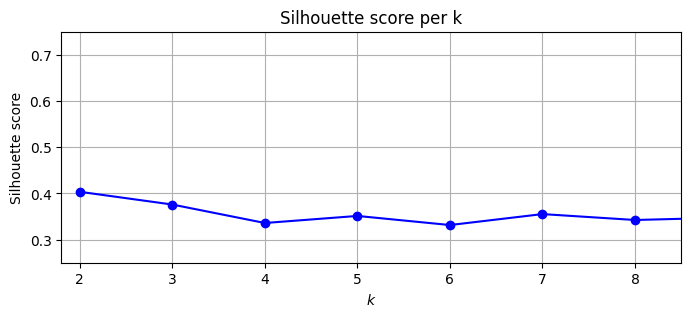

In [60]:
kmeans_models = [KMeans(n_clusters=k, random_state=1812).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X,
                                     model.labels_)

# Iteramos sobre cada modelo omitiendo el primer modelo que tiene un solo cluster (k=1).

for model in kmeans_models[1:]]

# Creamos una figura para trazar el resultado.
plt.figure(figsize=(8, 3))
# Creamos un gráfico de línea donde el eje x representa el número de clusters (k) y el eje y representa el coeficiente de Silhouette.

plt.plot(range(2, 10), silhouette_scores, "bo-")

plt.title("Silhouette score per k")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.25, 0.75])
plt.grid()
plt.show()


### Métrica - Inercia

### *Pregunta 6*
Graficar la inercia y aplicar el método del codo para determinar el K óptimo.

Emplear un range(1, 10).


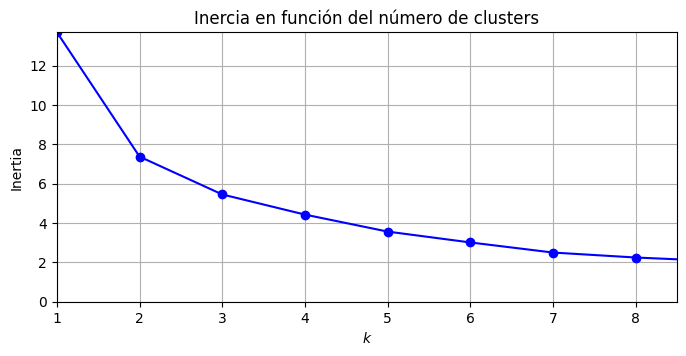

In [61]:
inertias = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")

plt.title("Inercia en función del número de clusters")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, np.max(inertias)])


# Agregamos una cuadrícula en el gráfico.
# Mostramos el gráfico.
plt.grid()
plt.show()

### *Pregunta 7*

Indicar el K óptimo a partir de las métricas de silohuette score e inercia obtenidas. Justificar su respuesta.

```
# Ingrese su respuesta aquí (texto). Se puede ver en el texto que el kernel con valor 2 ya hace caer bastante la inercia lo cual es bueno. Sin embargo, el que puede ser el más adecuado es el 5 porque a partir de ese kernel ya la inercia disminuye muy marginalmente, pero el 5 es adecuado porque ya la inercia alcanza una buena profundidad.

```


## Visualización del resultado (gráfico 3D)

Pregunta 9

```
Completar el código con el número de clusters elegido.
Completar el código para que se observen los marcadores (estrellas) correspondientes a todos los centroides.
```



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


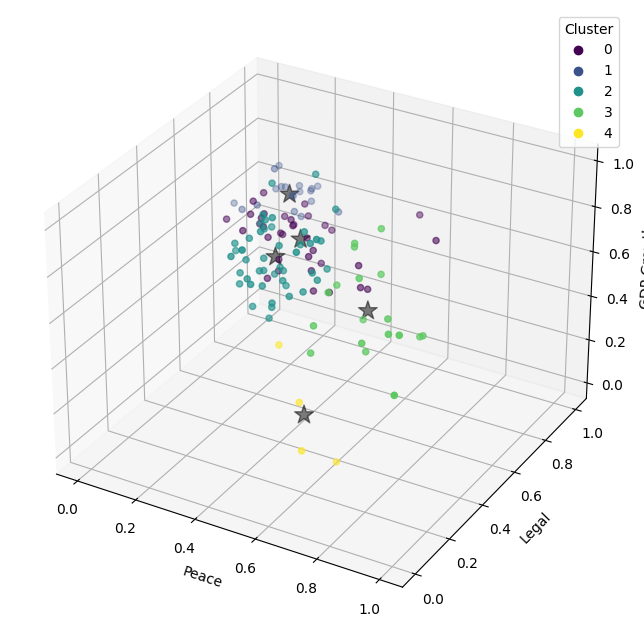

In [85]:
# Realizar el clustering con un número específico de clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Graficar los puntos en un gráfico de dispersión en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=kmeans.labels_, marker='o')
centers = kmeans.cluster_centers_

# Ingrese su respuesta aquí (complete el código)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', marker='*', s=200, alpha=0.5)
ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

# Agregar la leyenda con el número de cluster
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title='Cluster')

plt.show()

## Centroides

## *Pregunta 8*

In [86]:
# Obtener los centroides. Asignar el nombre "centers".
# Ingrese su respuesta aquí (código)
for centroid in kmeans.cluster_centers_:
    print("Coordenadas del centroide:", centroid)

Coordenadas del centroide: [0.34395174 0.61994466 0.67662917]
Coordenadas del centroide: [0.14627775 0.89127802 0.63824824]
Coordenadas del centroide: [0.41232526 0.36302672 0.78871314]
Coordenadas del centroide: [0.74340928 0.3103239  0.71562985]
Coordenadas del centroide: [0.54614715 0.29200463 0.19120459]


In [87]:
# Crear un dataframe con los centroides.
df_centroids = pd.DataFrame(centers, columns=X.columns)

# Imprimir los centroides por columna de variable.
print(df_centroids)

      Peace     Legal  GDP Growth
0  0.343952  0.619945    0.676629
1  0.146278  0.891278    0.638248
2  0.412325  0.363027    0.788713
3  0.743409  0.310324    0.715630
4  0.546147  0.292005    0.191205


## *Pregunta 9*

Basándonos en los centroides proporcionados, podemos analizar cada grupo en función de los valores de las variables.

Redacte una interpretación general de cada grupo basada en los centroides:



```
Ingrese su respuesta aquí (texto). Máximo 2 líneas por cluster.

Ejemplo:
- El primer grupo puede representar países en desarrollo por el crecimiento alto de PBI. Además, puede mostrar una gran deficiencia en la percepción de justicia. Con una estabilidad o paz, media alta. clasificación: Medio alto

- El segundo grupo puede representar países con un buen crecimiento de PBI. Gran percepción de justicia. Se muestra una gran estabilidad. Pueden ser países desarrollados. clasificación: Alto

- El tercer grupo de países muestra mucha deficiencia en la justicia, pero tiene un índice de paz medio alto; es decir, no es una zona tan conflictiva. clasificación: Medio

- El cuarto grupo muestra muy gran indice de Peace, lo cual indica que se encuentran en conflicto constante. Tampoco muestra buen índice de precepción de justicia. Puede ser el medio oriente o países africanos. clasificación: Medio bajo

- El quinto grupo es el de países rezagados en crecimiento con bajos índices de percepción de justicia y con bastante conflicto. clasificación: Bajo
```

## Predicciones

Contar los países por clúster.

In [88]:
# Obtener las predicciones
predictions = kmeans.predict(X)

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame({'Prediction': predictions})

# Contar los grupos por clase
group_counts = df_predictions['Prediction'].value_counts()

# Imprimir los conteos por clase
print(group_counts)

Prediction
2    45
0    35
1    19
3    18
4     4
Name: count, dtype: int64


## Pregunta 10

In [89]:
# Obtener las predicciones. Asignar el nombre predictions a las predicciones.
# Ingrese su respuesta aquí (código)
predictions = kmeans.predict(X)

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame({'Prediction': predictions})

# Definir un diccionario de mapeo para los nombres de las predicciones
mapping = {0: 'Medio alto', 1: 'Alto', 2: 'Medio', 3: 'Medio bajo', 4: 'Bajo'}  # ajusta según el número de clusters y los nombres deseados

# Aplicar el mapeo para cambiar los nombres de las predicciones
df_predictions['Prediction'] = df_predictions['Prediction'].map(mapping)

# Contar los grupos por clase
group_counts = df_predictions['Prediction'].value_counts()

# Imprimir los conteos por clase
print(group_counts)

Prediction
Medio         45
Medio alto    35
Alto          19
Medio bajo    18
Bajo           4
Name: count, dtype: int64


Imprimir las predicciones en una columna adicional a la "tabla original raw".

In [90]:
# Agregar la columna de predicciones a la tabla de datos X
raw_original['Prediction'] = predictions

# Imprimir la tabla con la columna de predicciones
raw_original

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth,Prediction
0,Albania,AL,35,1.821,4.546,2.983,2
1,Algeria,DZ,35,2.219,4.435,2.553,2
2,Argentina,AR,45,1.989,5.087,-3.061,4
3,Armenia,AM,42,2.294,4.812,6.000,2
4,Australia,AU,77,1.419,8.363,1.713,1
...,...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400,0
117,Vietnam,VI,37,1.877,5.084,6.500,2
118,Yemen,YE,15,3.369,2.671,2.113,3
119,Zambia,ZM,34,1.805,4.592,2.021,2


Identificar los grupos obtenidos para algunos países.

In [101]:
# Buscar el grupo correspondiente a Perú
peru_index = raw_original.index[raw_original['Country'] == 'Peru']
peru_group = df_predictions.iloc[peru_index]['Prediction'].values[0]

# Imprimir el grupo correspondiente a Perú
print("El grupo correspondiente a Perú es:", peru_group)

El grupo correspondiente a Perú es: Medio


## *Pregunta 11*
Identificar el grupo correspondiente a Brazil e indicar si Perú y Brazil pertenecen al mismo grupo.

In [105]:
# Ingrese su respuesta aquí (código)
# Obtener el índice del país Brasil en raw_original
brasil_index = raw_original.index[raw_original['Country'] == 'Brazil']

# Acceder a las predicciones para el índice de Brasil
brasil_group = df_predictions.iloc[brasil_index]['Prediction'].values[0]

# Imprimir el grupo correspondiente a Brasil
print("El grupo correspondiente a Brasil es:", brasil_group)


El grupo correspondiente a Brasil es: Medio alto


```
# Ingrese su respuesta aquí (texto)
No pertenecen al mismo grupo, Basil es medio alto y Perú es un país medio
```